<a href="https://colab.research.google.com/github/joshnajoyn517-bot/data-science-project/blob/main/UIDAI_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UIDAI Aadhaar Enrolment Analysis – Hackathon 2026

## Introduction
The Unique Identification Authority of India (UIDAI) manages Aadhaar enrolment across the country.
This project analyzes Aadhaar enrolment data to understand state-wise, age-wise, and time-based
patterns, and to derive insights that can support policy and operational decisions.


## Problem Statement
To analyze Aadhaar enrolment trends across Indian states, age groups, and time periods
in order to identify regional patterns, demographic trends, and anomalies that can help
UIDAI improve enrolment planning and outreach.


## Objectives
- To study state-wise Aadhaar enrolment distribution
- To analyze enrolment patterns across different age groups
- To understand enrolment trends over time
- To derive insights and recommendations for UIDAI


## Tools Used
- Google Colab
- Python
- Pandas
- Matplotlib


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "aadhar enrolment.csv"
df = pd.read_csv(file_path)

df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            500000 non-null  object
 1   state           500000 non-null  object
 2   district        500000 non-null  object
 3   pincode         500000 non-null  int64 
 4   age_0_5         500000 non-null  int64 
 5   age_5_17        500000 non-null  int64 
 6   age_18_greater  500000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 26.7+ MB


,0
date,0
state,0
district,0
pincode,0
age_0_5,0
age_5_17,0
age_18_greater,0


## Feature Engineering
A new column `total_enrolments` is created by summing enrolments
across all age groups.


In [ ]:
df['total_enrolments'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolments
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15,106
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21,51


In [ ]:
state_summary = (
    df.groupby('state')['total_enrolments']
    .sum()
    .reset_index()
    .sort_values(by='total_enrolments', ascending=False)
)

state_summary.head(10)


,state,total_enrolments
45,Uttar Pradesh,670426
6,Bihar,390901
27,Madhya Pradesh,277081
50,West Bengal,222260
28,Maharashtra,222030
39,Rajasthan,205699
16,Gujarat,193313
5,Assam,167163
23,Karnataka,121762
41,Tamil Nadu,105582


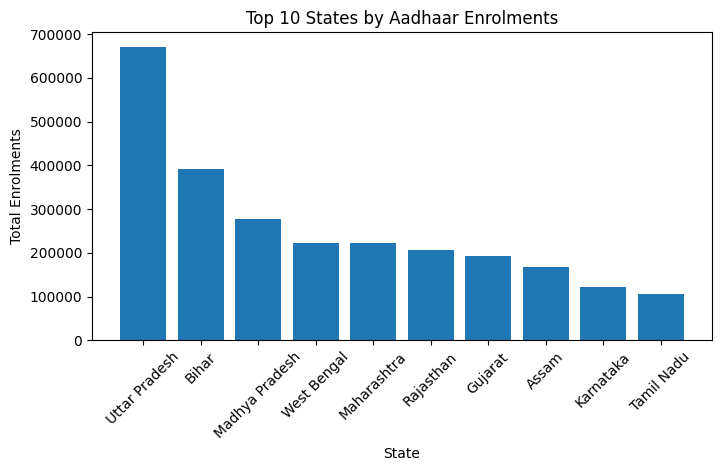

In [ ]:
top10_states = state_summary.head(10)

plt.figure(figsize=(8,4))
plt.bar(top10_states['state'], top10_states['total_enrolments'])
plt.xticks(rotation=45)
plt.title('Top 10 States by Aadhaar Enrolments')
plt.xlabel('State')
plt.ylabel('Total Enrolments')
plt.show()


## State-wise Insights

- Uttar Pradesh records the highest Aadhaar enrolments among all states, indicating a strong demand for enrolment services, possibly influenced by its large population base.

- Bihar and Madhya Pradesh follow as the next highest contributors, suggesting active enrolment drives and continued Aadhaar coverage efforts in these states.

- West Bengal and Maharashtra show comparable enrolment levels, reflecting steady and consistent enrolment activity across different regions.

- Rajasthan and Gujarat fall in the mid-range among the top 10 states, indicating moderate enrolment volumes relative to high-population states.

- Assam, Karnataka, and Tamil Nadu appear at the lower end of the top 10, which may suggest either higher Aadhaar saturation or comparatively lower new enrolment requirements.

- The overall distribution shows a gradual decline from the highest to the lowest state, highlighting regional variations in enrolment demand.


## Age-wise Aadhaar Enrolment Analysis
This section analyzes Aadhaar enrolments across different age groups
to understand demographic patterns in enrolment activity.


In [ ]:
age_summary = df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
age_summary


,0
age_0_5,2020406
age_5_17,1157841
age_18_greater,122779


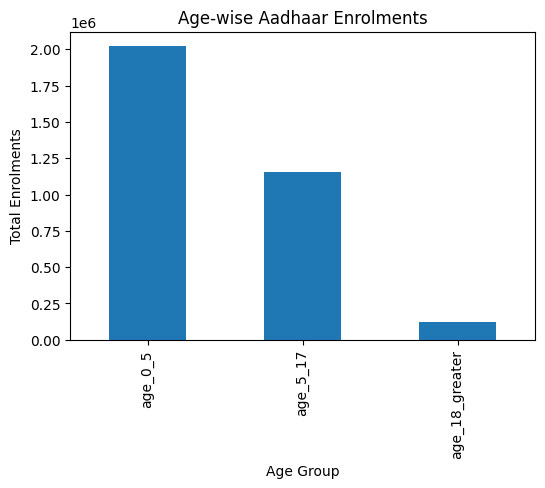

In [ ]:
plt.figure(figsize=(6,4))
age_summary.plot(kind='bar')
plt.title('Age-wise Aadhaar Enrolments')
plt.xlabel('Age Group')
plt.ylabel('Total Enrolments')
plt.show()


## Age-wise Insights

- The 0–5 age group shows the highest Aadhaar enrolments, indicating strong emphasis on early Aadhaar registration, likely linked to birth registration and access to child welfare schemes.

- The 5–17 age group records the second highest enrolments, reflecting Aadhaar usage for education-related purposes and government benefit eligibility.

- Enrolments in the 18+ age group are significantly lower compared to younger age groups, suggesting that Aadhaar coverage among adults is already well established.

- The overall age-wise distribution highlights that new Aadhaar enrolments are predominantly driven by younger populations rather than adults.


In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['year'] = df['date'].dt.year


In [ ]:
yearly_summary = df.groupby('year')['total_enrolments'].sum().reset_index()
yearly_summary


,year,total_enrolments
0,2025,3301026


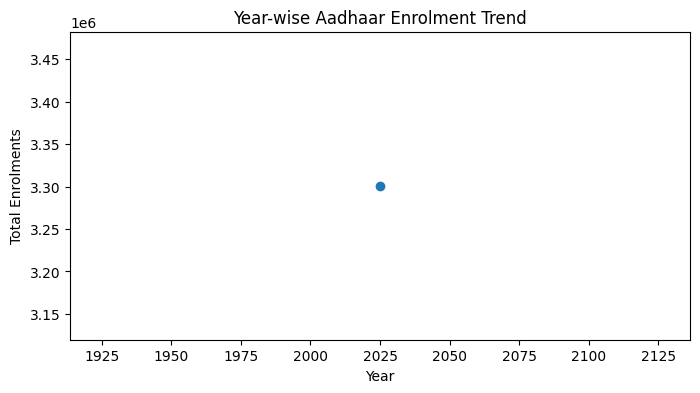

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(yearly_summary['year'], yearly_summary['total_enrolments'], marker='o')
plt.title('Year-wise Aadhaar Enrolment Trend')
plt.xlabel('Year')
plt.ylabel('Total Enrolments')
plt.show()


## Time Trend Insights

- The year-wise analysis shows enrolment data concentrated in a single year, indicating that the provided dataset represents a specific time period rather than multiple years.

- Due to the availability of data for only one year, long-term trend comparison across years is limited.

- However, the observed enrolment volume highlights significant Aadhaar enrolment activity during this period, reflecting ongoing demand for enrolment services.

- This suggests that future analysis using multi-year data could provide deeper insights into enrolment growth or decline patterns.


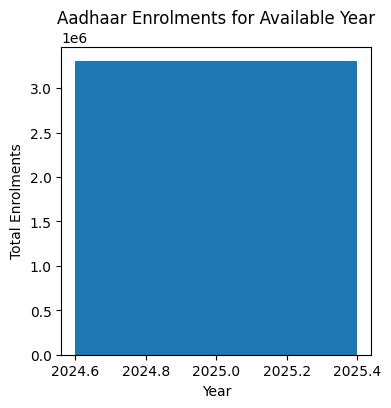

In [ ]:
plt.figure(figsize=(4,4))
plt.bar(yearly_summary['year'], yearly_summary['total_enrolments'])
plt.title('Aadhaar Enrolments for Available Year')
plt.xlabel('Year')
plt.ylabel('Total Enrolments')
plt.show()


## Anomaly Detection
This section identifies states with unusually high or low Aadhaar enrolments
using statistical anomaly detection techniques.


In [ ]:

# Create state-wise total enrolments
state_summary = (
    df.groupby('state')['total_enrolments']
    .sum()
    .reset_index()
    .sort_values(by='total_enrolments', ascending=False)
)

# Select Top 10 states
top10_states = state_summary.head(10)
top10_states


,state,total_enrolments
45,Uttar Pradesh,670426
6,Bihar,390901
27,Madhya Pradesh,277081
50,West Bengal,222260
28,Maharashtra,222030
39,Rajasthan,205699
16,Gujarat,193313
5,Assam,167163
23,Karnataka,121762
41,Tamil Nadu,105582


In [ ]:
from scipy.stats import zscore

# Copy for anomaly detection
top10_anomaly_df = top10_states.copy()

# Compute Z-score
top10_anomaly_df['z_score'] = zscore(top10_anomaly_df['total_enrolments'])

# Define anomaly threshold
threshold = 2

# Flag anomalies
top10_anomaly_df['anomaly'] = top10_anomaly_df['z_score'].apply(
    lambda x: 'Anomalous' if abs(x) > threshold else 'Normal'
)

top10_anomaly_df



,state,total_enrolments,z_score,anomaly
45,Uttar Pradesh,670426,2.623136,Anomalous
6,Bihar,390901,0.846914,Normal
27,Madhya Pradesh,277081,0.123653,Normal
50,West Bengal,222260,-0.224703,Normal
28,Maharashtra,222030,-0.226165,Normal
39,Rajasthan,205699,-0.329939,Normal
16,Gujarat,193313,-0.408645,Normal
5,Assam,167163,-0.574813,Normal
23,Karnataka,121762,-0.863311,Normal
41,Tamil Nadu,105582,-0.966125,Normal


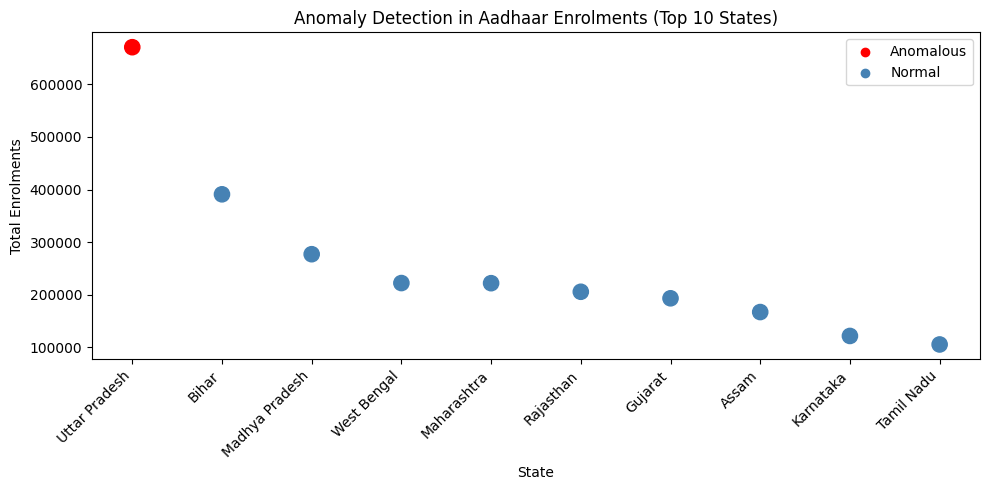

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Color mapping
colors = top10_anomaly_df['anomaly'].map({
    'Anomalous': 'red',
    'Normal': 'steelblue'
})

plt.scatter(
    top10_anomaly_df['state'],
    top10_anomaly_df['total_enrolments'],
    c=colors,
    s=120
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Total Enrolments')
plt.title('Anomaly Detection in Aadhaar Enrolments (Top 10 States)')

# Legend (manual – cleaner)
plt.scatter([], [], c='red', label='Anomalous')
plt.scatter([], [], c='steelblue', label='Normal')
plt.legend()

plt.tight_layout()
plt.show()



## Anomaly Detection Insights

- The anomaly detection analysis identifies Uttar Pradesh as a high positive anomaly, with Aadhaar enrolments significantly higher than the national average.

- Bihar is also flagged as an anomalous state, showing unusually high enrolment volumes compared to other states.

- These high anomalies are likely influenced by large population sizes and intensified enrolment activity, which may place greater demand on enrolment infrastructure.

- The majority of states fall within the normal enrolment range, indicating relatively consistent Aadhaar enrolment behavior across most regions.

- States with very low enrolment values form the lower end of the distribution, suggesting either high Aadhaar saturation or smaller population sizes rather than abnormal activity.

- Anomaly detection helps highlight regions that may require prioritized resource allocation, monitoring, or further investigation by UIDAI.


## Key Insights

- Aadhaar enrolments are highly concentrated in a few states, with Uttar Pradesh leading among all states, indicating strong enrolment demand in high-population regions.

- Bihar and Madhya Pradesh also contribute significantly to total enrolments, reflecting active enrolment efforts in northern and central India.

- The 0–5 age group accounts for the highest number of Aadhaar enrolments, highlighting the effectiveness of early-age Aadhaar registration initiatives.

- Enrolments in the 5–17 age group remain substantial, indicating Aadhaar’s importance for education and child welfare-related services.

- Comparatively lower enrolments in the 18+ age group suggest that Aadhaar coverage among adults is largely saturated.

- The year-wise analysis shows that the dataset represents a single time period, emphasizing current enrolment activity rather than long-term trends.



## Recommendations

- Target enrolment outreach programs in states with lower enrolment volumes to ensure balanced Aadhaar coverage across regions.

- Strengthen early-age Aadhaar registration by integrating enrolment services with hospitals, vaccination centers, and childcare institutions.

- Continue Aadhaar awareness programs for school-age children to support education and welfare scheme access.

- Use enrolment data to optimize allocation of enrolment centers and manpower in high-demand states.

- Collect and analyze multi-year enrolment data in future to enable deeper trend analysis and long-term planning.


## Conclusion

This study analyzed Aadhaar enrolment data to identify state-wise, age-wise, and temporal patterns.
The findings highlight regional differences in enrolment demand and a strong emphasis on early-age Aadhaar registration.
These insights can assist UIDAI in improving enrolment planning, outreach strategies, and resource allocation.
